In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction

## Dataset
This dataset has been sourced from Kaggle:
https://www.kaggle.com/uciml/horse-colic

It contains typical equine colic symptoms as well as the outcome after the colic.

There is one CSV file (horse.csv) and a data dictionary that can can be found in the same folder (datadict.txt)

## What is equine colic

Colic in horses is defined as abdominal pain, but it is a clinical symptom rather than a diagnosis. The term colic can encompass all forms of gastrointestinal conditions which cause pain as well as other causes of abdominal pain not involving the gastrointestinal tract. (Source: Wikipedia)

## Questions for this analysis
In this analysis, I will aim to answer three business questions based on the data:
- According to this dataset, what are the colic survival rates of younger horses compared to older horses ?
- Will colic surgery always save my horse's life ?
- Which of the vital signs or symptoms, that I can check as a horse owner, are the best indicators that my horse might require surgery ?


## Data Cleaning and wrangling
I will approach this as a unique process for each question, as we have unique features involved in answering each questions, and in some cases imputation and cleaning are required, and in some cases not

# Read in data and initial exploration

In [2]:
horse_dataset=pd.read_csv("horse.csv")
horse_dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
#How big is the dataset ?
horse_dataset.shape

(299, 28)

In [4]:
#Which datatypes does it currently have ?
horse_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [5]:
horse_dataset.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [6]:
#We will add one extra column, which might be useful in answering two of our questions. If the horse died or was humanely euthanized, it did not survive.
#The column will be called 'survived' with 1 or 0 boolean value
def horse_survived(row):
    if row['outcome']=='lived':
        return 1
    else:
        return 0
    
horse_dataset['survived'] = horse_dataset.apply (lambda row: horse_survived(row), axis=1)

horse_dataset.head()
        

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,survived
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,8.4,NaN,NaN,died,no,11300,0,0,no,0
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,85.0,cloudy,2.0,euthanized,no,2208,0,0,no,0
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,6.7,NaN,NaN,lived,no,0,0,0,yes,1
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,7.2,serosanguious,5.3,died,yes,2208,0,0,yes,0
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,7.4,NaN,NaN,died,no,4300,0,0,no,0


In [7]:
#Check our new column's values
horse_dataset['survived'].value_counts()

1    178
0    121
Name: survived, dtype: int64

# According to this dataset, what are the colic survival rates of younger horses compared to older horses??

In [8]:
#To answer this question, we will only require three columns: age, outcome and survived
horse_age_outcome=horse_dataset[['age','outcome','survived']]
horse_age_outcome.head()

,age,outcome,survived
0,adult,died,0
1,adult,euthanized,0
2,adult,lived,1
3,young,died,0
4,adult,died,0


In [9]:
horse_age_outcome.describe()

,survived
count,299.000000
mean,0.595318
std,0.491653
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
#We recall that we have 299 rows and can see from above that we have no null values, but let's make sure:
no_nulls = set(horse_age_outcome.columns[horse_age_outcome.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'age', 'outcome', 'survived'}

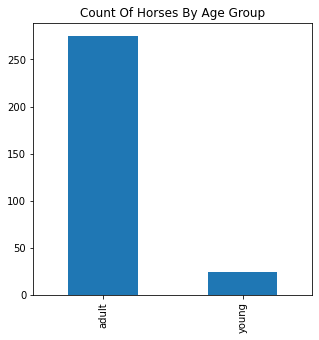

In [79]:
# Next lets investigate how the age groups are distributed
horse_age_outcome.age.value_counts().plot(kind='bar', title="Count Of Horses By Age Group");

#Note what the age column means according to our data dictionary:
#2: Age 
#1 = Adult horse 
#2 = Young (< 6 months) 

In [49]:
# % young horses in dataset
(horse_age_outcome[horse_age_outcome['age']=='young'].shape[0]/horse_age_outcome.shape[0])*100

8.02675585284281

In [50]:
# % adult horses in dataset
(horse_age_outcome[horse_age_outcome['age']=='adult'].shape[0]/horse_age_outcome.shape[0])*100

91.9732441471572

In [12]:
#We can easily see that we do not have a lot data on young horses in this dataset. But we can investigate what we have

In [13]:
horse_age_outcome_grouped=horse_age_outcome.groupby(['age','outcome']).agg({'outcome':'count'})
horse_age_outcome_grouped

outcome
age   outcome            
adult died             66
      euthanized       43
      lived           166
young died             11
      euthanized        1
      lived            12

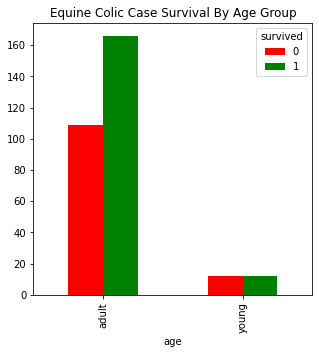

In [78]:
pd.crosstab(horse_age_outcome['age'],horse_age_outcome['survived']).plot.bar(color=['red','green'], title="Equine Colic Case Survival By Age Group");

In [60]:
# % young horses survived
(horse_age_outcome[(horse_age_outcome['age']=='young')&(horse_age_outcome['survived']==1)].shape[0]/horse_age_outcome[horse_age_outcome['age']=='young'].shape[0])*100

50.0

In [61]:
# % young horses survived
(horse_age_outcome[(horse_age_outcome['age']=='adult')&(horse_age_outcome['survived']==1)].shape[0]/horse_age_outcome[horse_age_outcome['age']=='adult'].shape[0])*100

60.36363636363637

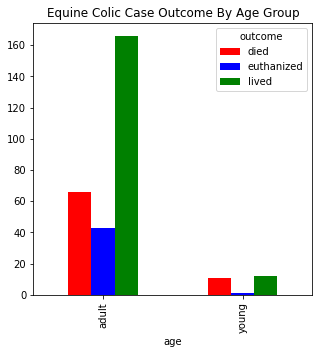

In [77]:
pd.crosstab(horse_age_outcome['age'],horse_age_outcome['outcome']).plot.bar(color=['red','blue','green'], title="Equine Colic Case Outcome By Age Group");

In [15]:
horse_age_survived_grouped=horse_age_outcome.groupby(['age','survived']).agg({'survived':'count'})
horse_age_survived_grouped

survived
age   survived          
adult 0              109
      1              166
young 0               12
      1               12

In [16]:
#From the visuals and figures above, we see that 50% of young horses survived colic and 50% of them unfortunately did not. Where as when we compare to adult horses, a 166 horses survived and 109 did not.


# Will colic surgery guarantee my horse's survival ?

In [17]:
#To answer this question, we will only require two columns: surgery and outcome
horse_surgery_outcome=horse_dataset[['surgery','outcome','survived']]
horse_surgery_outcome.head()

,surgery,outcome,survived
0,no,died,0
1,yes,euthanized,0
2,no,lived,1
3,yes,died,0
4,no,died,0


In [18]:
horse_surgery_outcome.describe()

,survived
count,299.000000
mean,0.595318
std,0.491653
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [19]:
#We recall that we have 299 rows and can see from above that we have no null values, but let's make sure:
no_nulls = set(horse_surgery_outcome.columns[horse_surgery_outcome.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'outcome', 'surgery', 'survived'}

In [20]:
horse_surgery_outcome_grouped=horse_surgery_outcome.groupby(['surgery','outcome']).agg({'outcome':'count'})
horse_surgery_outcome_grouped

outcome
surgery outcome            
no      died             19
        euthanized       17
        lived            83
yes     died             58
        euthanized       27
        lived            95

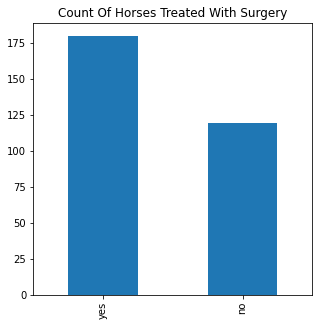

In [76]:
# Next lets investigate how the surgery groups are distributed
horse_surgery_outcome.surgery.value_counts().plot(kind='bar', title="Count Of Horses Treated With Surgery");

#Note what the surgery column means according tour data dictionary:
#1: surgery? 
#yes = Yes, it had surgery 
#no = It was treated without surgery  

In [22]:
#We can see quite a few more horses had surgery than those treated without it.
horses_surgery=round(horse_surgery_outcome[horse_surgery_outcome['surgery']=='yes'].shape[0]/horse_surgery_outcome.shape[0],3)
horses_no_surgery=round(horse_surgery_outcome[horse_surgery_outcome['surgery']=='no'].shape[0]/horse_surgery_outcome.shape[0],3)


In [23]:
print("Horses treated with surgery ",horses_surgery,"%")
print("Horses treated without surgery ",horses_no_surgery,"%")

Horses treated with surgery  0.602 %
Horses treated without surgery  0.398 %


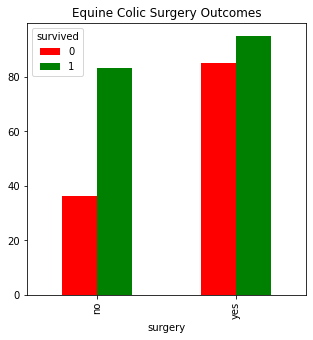

In [75]:
pd.crosstab(horse_surgery_outcome['surgery'],horse_surgery_outcome['survived']).plot.bar(color=['red','green'], title="Equine Colic Surgery Outcomes");


In [64]:
#The chart above clearly shows us that unfortunately surgery does not always guarantee that your horse will survive colic.

In [66]:
# % horses treated with surgery and survived
(horse_surgery_outcome[(horse_surgery_outcome['surgery']=='yes')&(horse_surgery_outcome['survived']==1)].shape[0]/horse_surgery_outcome[horse_surgery_outcome['surgery']=='yes'].shape[0])*100

52.77777777777778

# Which of the vital signs or symptoms, that I can check as a horse owner, are the best indicators that my horse might require surgery ?

## Which symptoms or vital signs can I check while waiting on my vet ?

 Some helpful articles can be found here:
 https://thehorse.com/133159/normal-horse-vitals-signs-and-health-indicators/
 https://thehorse.com/features/dealing-with-equine-colic/
 Based on these articles, we can use the following features found in our dataset:
 - rectal temperature, 
 - pulse, 
 - respiratory rate, 
 - mucous membranes, 
 - capillary refill time, 
 - abdominal distension, 
 - peristalsis

In [26]:
# Lets put these in a list, along with our y variable (surgery), so we can create a subset for our model
owner_check_vitals=[
'rectal_temp', 
'pulse', 
'respiratory_rate', 
'mucous_membrane', 
'capillary_refill_time', 
'abdominal_distention', 
'peristalsis',
'surgery'
]

owner_check_vitals_df=horse_dataset[owner_check_vitals]
owner_check_vitals_df.head()


,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,peristalsis,surgery
0,38.5,66.0,28.0,NaN,more_3_sec,severe,absent,no
1,39.2,88.0,20.0,pale_cyanotic,less_3_sec,slight,absent,yes
2,38.3,40.0,24.0,pale_pink,less_3_sec,none,hypomotile,no
3,39.1,164.0,84.0,dark_cyanotic,more_3_sec,severe,absent,yes
4,37.3,104.0,35.0,dark_cyanotic,more_3_sec,NaN,NaN,no


In [27]:
#Check for any null values
no_nulls = set(owner_check_vitals_df.columns[owner_check_vitals_df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'surgery'}

In [28]:
#From the above we can see that only the surgery column has no NaN values. So we will go through each column - 
#if it has >80% null values, we will drop it, alternatively we will impute values

In [38]:
continuous_columns=['rectal_temp','pulse','respiratory_rate']
categorical_columns=['mucous_membrane','capillary_refill_time','abdominal_distention','peristalsis','surgery']

#Fill continuous features with mean
for col in continuous_columns:
    percentage_null_values=owner_check_vitals_df[col].isnull().sum()/owner_check_vitals_df.shape[0]
    if percentage_null_values>0.8:
        owner_check_vitals_df.drop(columns=col, inplace=True)
    else:
        owner_check_vitals_df.fillna(value={col:owner_check_vitals_df[col].mean()}, inplace=True)

#Fill categorical features with mode
for col in categorical_columns:
    percentage_null_values=owner_check_vitals_df[col].isnull().sum()/owner_check_vitals_df.shape[0]
    if percentage_null_values>0.8:
        owner_check_vitals_df.drop(columns=col, inplace=True)
    else:
        owner_check_vitals_df.fillna(value={col:owner_check_vitals_df[col].mode()[0]}, inplace=True)

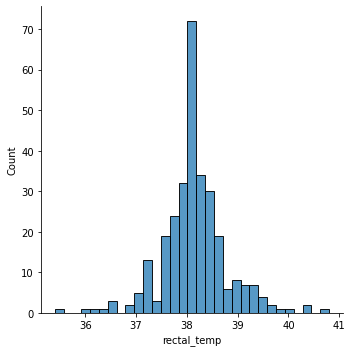

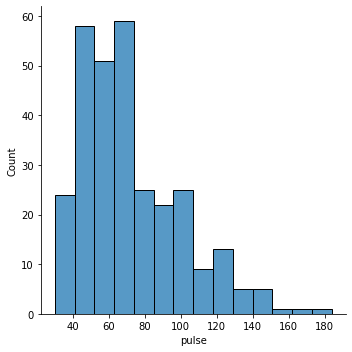

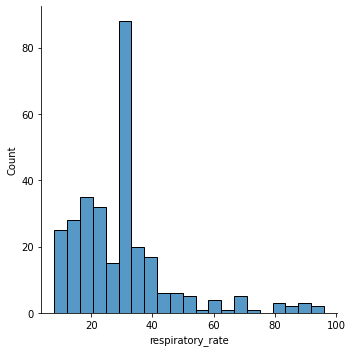

In [39]:
# See if we have any outliers
for col in continuous_columns:
    sns.displot(owner_check_vitals_df, x=col)


In [40]:
#Normalize the above continuous features
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

owner_check_vitals_minmax_transform = pd.DataFrame(data = owner_check_vitals_df)
owner_check_vitals_minmax_transform[continuous_columns] = scaler.fit_transform(owner_check_vitals_df[continuous_columns])

# Show an example of a record with scaling applied
display(owner_check_vitals_minmax_transform.head(n = 5))

,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,peristalsis,surgery
0,0.574074,0.233766,0.227273,normal_pink,more_3_sec,severe,absent,no
1,0.703704,0.376623,0.136364,pale_cyanotic,less_3_sec,slight,absent,yes
2,0.537037,0.064935,0.181818,pale_pink,less_3_sec,none,hypomotile,no
3,0.685185,0.870130,0.863636,dark_cyanotic,more_3_sec,severe,absent,yes
4,0.351852,0.480519,0.306818,dark_cyanotic,more_3_sec,none,hypomotile,no


In [41]:
#Split out the outcome column (surgery)
surgery=owner_check_vitals_minmax_transform['surgery']
#Encode surgery to numeric values
outcome_surgery = surgery.map({'no':0,'yes':1})
#Drop surgery column from the dataset
owner_check_vitals_minmax_transform.drop(columns='surgery', inplace=True)

In [42]:
#One-hot encode the 'owner_check_vitals_minmax_transform' data using pandas.get_dummies()
vitals_final = pd.get_dummies(owner_check_vitals_minmax_transform)

In [43]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'vitals' and 'surgery' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vitals_final, 
                                                    outcome_surgery, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 239 samples.
Testing set has 60 samples.


In [44]:
#Now we can build our model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score,accuracy_score

#Initialise the model
logistic_regression_model = LogisticRegression(random_state=42)

#Fit the model to the training data
logistic_regression_model = logistic_regression_model.fit(X_train,y_train)
    
        
#Get the predictions on the test set(X_test),
predictions_test = logistic_regression_model.predict(X_test)
predictions_train = logistic_regression_model.predict(X_train)

#Compute accuracy on the first 300 training samples which is y_train[:300]
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score using fbeta_score()
f_train= fbeta_score(y_train, predictions_train, beta=0.5)
f_test = fbeta_score(y_test,predictions_test, beta=0.5)
       
# Success
print("{} trained.".format(logistic_regression_model.__class__.__name__))


LogisticRegression trained.


In [45]:
print("Training Accuracy Score: ",accuracy_train)
print("Testing Accuracy Score: ",accuracy_test)
print("Training beta score",f_train )
print("Testing beta score",f_test )

Training Accuracy Score:  0.6736401673640168
Testing Accuracy Score:  0.7333333333333333
Training beta score 0.7097989949748743
Testing beta score 0.78125


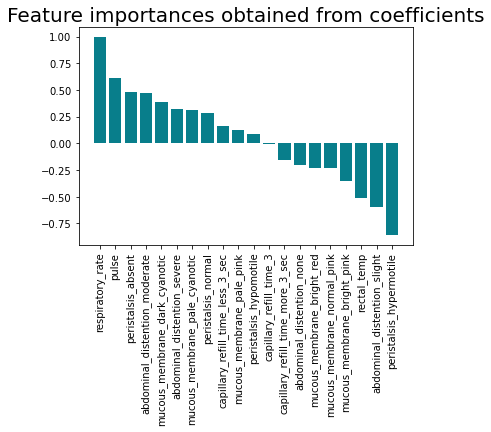

In [46]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logistic_regression_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()